## Create Merged Dataset

In [43]:
from dataclasses import dataclass
from pprint import pprint
import glob
import os
import os.path

@dataclass
class DataPaths:
    pre_img: str
    post_img: str
    pre_target: str
    post_target: str
    stem: str
    """base name; without path, pre-post suffix and extension."""

class Dataset:
    base_path: str
    all_data: list[DataPaths]
    train_ratio: float
    def __init__(self, base_path: str, train_ratio: float = None):
        self.base_path = base_path
        if train_ratio is None:
            self.train_ratio = 0.90
        else:
            self.train_ratio = train_ratio
        self.all_data = []
    def __repr__(self):
        return f"DS: {self.base_path} | data count: {self.count} | {self.train_ratio = }"
    @property
    def count(self):
        return len(self.all_data)

datasets_to_merge = [
    ("/mnt/storage1/alpgenc/change_detection/xBD_complete_png/test"                         , 0.90),
    ("/mnt/storage1/alpgenc/change_detection/xBD_complete_png/train_combined"               , 0.90),
    ("/mnt/storage1/alpgenc/change_detection/datasets/earthquake_turkey/earthquake-turkey"  , 0.80),
    ("/mnt/storage1/alpgenc/change_detection/datasets/hurricane_ida/hurricane-ida"          , 0.85),
    ("/mnt/storage1/alpgenc/change_detection/datasets/pakistan_flooding/pakistan-flooding"  , 0.85),
]

DATASETS = [Dataset(base_path=path, train_ratio=ratio) for (path, ratio) in datasets_to_merge]

for ds in DATASETS:
    all_pre_images = glob.glob(f"{ds.base_path}/images/*_pre_disaster.png")
    ds.all_data = []

    print(f"Generating paths in {ds.base_path} ...")
    for i, pre_img_path in enumerate(all_pre_images):
        post_img_path = pre_img_path.replace("pre", "post")
        img_base, _, _ = pre_img_path.rsplit("_", 2) # path/to/images/malawi-cyclone_00000342_pre_disaster.tif

        target_base = img_base.replace("images", "targets")
        pre_target_path = f"{target_base}_pre_disaster_target.png"
        post_target_path = f"{target_base}_post_disaster_target.png"

        stem = os.path.basename(img_base)

        ds.all_data.append(DataPaths(pre_img_path, post_img_path, pre_target_path, post_target_path, stem))

pprint(DATASETS)
TOTAL_DATA = sum([ds.count for ds in DATASETS])
print(f"Total Data: {TOTAL_DATA} (# images: {TOTAL_DATA * 2})")



Generating paths in /mnt/storage1/alpgenc/change_detection/xBD_complete_png/test ...
Generating paths in /mnt/storage1/alpgenc/change_detection/xBD_complete_png/train_combined ...
Generating paths in /mnt/storage1/alpgenc/change_detection/datasets/earthquake_turkey/earthquake-turkey ...
Generating paths in /mnt/storage1/alpgenc/change_detection/datasets/hurricane_ida/hurricane-ida ...
Generating paths in /mnt/storage1/alpgenc/change_detection/datasets/pakistan_flooding/pakistan-flooding ...
[DS: /mnt/storage1/alpgenc/change_detection/xBD_complete_png/test | data count: 933 | self.train_ratio = 0.9,
 DS: /mnt/storage1/alpgenc/change_detection/xBD_complete_png/train_combined | data count: 9168 | self.train_ratio = 0.9,
 DS: /mnt/storage1/alpgenc/change_detection/datasets/earthquake_turkey/earthquake-turkey | data count: 944 | self.train_ratio = 0.8,
 DS: /mnt/storage1/alpgenc/change_detection/datasets/hurricane_ida/hurricane-ida | data count: 2638 | self.train_ratio = 0.85,
 DS: /mnt/sto

In [ ]:
import shutil
import os
import os.path
import tqdm

NEW_DATASET_NAME = "merged1"
NEW_DATASET_BASE_PATH = f"/mnt/storage1/alpgenc/change_detection/datasets/{NEW_DATASET_NAME}"
NEW_IMAGES_PATH = os.path.join(NEW_DATASET_BASE_PATH, "images")
NEW_TARGETS_PATH = os.path.join(NEW_DATASET_BASE_PATH, "targets")

if not os.path.exists(NEW_DATASET_BASE_PATH):
    os.mkdir(NEW_DATASET_BASE_PATH)
if not os.path.exists(NEW_IMAGES_PATH):
    os.mkdir(NEW_IMAGES_PATH)
if not os.path.exists(NEW_TARGETS_PATH):
    os.mkdir(NEW_TARGETS_PATH)

for ds in DATASETS:
    print(f"Copying {ds}")
    for d in tqdm.tqdm(ds.all_data):
        if not os.path.exists(os.path.join(NEW_IMAGES_PATH, f"{d.stem}_pre_disaster.png")):
            shutil.copy(d.pre_img, NEW_IMAGES_PATH)
        if not os.path.exists(os.path.join(NEW_IMAGES_PATH, f"{d.stem}_post_disaster.png")):
            shutil.copy(d.post_img, NEW_IMAGES_PATH)
        if not os.path.exists(os.path.join(NEW_TARGETS_PATH, f"{d.stem}_pre_disaster_target.png")):
            shutil.copy(d.pre_target, NEW_TARGETS_PATH)
        if not os.path.exists(os.path.join(NEW_TARGETS_PATH, f"{d.stem}_post_disaster_target.png")):
            shutil.copy(d.post_target, NEW_TARGETS_PATH)
    print(f"Completed: {ds}")


#* Since shutil was TOO SLOW, I also wrote a bash script to copy using rsync, which might be faster. BUT NOT TESTED.
# %%bash
# for ds in \
#     /mnt/storage1/alpgenc/change_detection/xBD_complete_png/test \
#     /mnt/storage1/alpgenc/change_detection/xBD_complete_png/train_combined \
#     /mnt/storage1/alpgenc/change_detection/datasets/earthquake_turkey/earthquake-turkey \
#     /mnt/storage1/alpgenc/change_detection/datasets/hurricane_ida/hurricane-ida \ 
#     /mnt/storage1/alpgenc/change_detection/datasets/pakistan_flooding/pakistan-flooding
# do
#     echo "Copying: $ds images"
#     rsync -avh --progress "$ds"/images/ /mnt/storage1/alpgenc/change_detection/datasets/merged1/images/
#     echo "Copying: $ds targets"
#     rsync -avh --progress "$ds"/targets/ /mnt/storage1/alpgenc/change_detection/datasets/merged1/targets/
# done

    


Copying DS: /mnt/storage1/alpgenc/change_detection/xBD_complete_png/test | data count: 933 | self.train_ratio = 0.9


100%|██████████| 933/933 [00:00<00:00, 995.12it/s] 


Completed: DS: /mnt/storage1/alpgenc/change_detection/xBD_complete_png/test | data count: 933 | self.train_ratio = 0.9
Copying DS: /mnt/storage1/alpgenc/change_detection/xBD_complete_png/train_combined | data count: 9168 | self.train_ratio = 0.9


100%|██████████| 9168/9168 [02:59<00:00, 51.16it/s]  


Completed: DS: /mnt/storage1/alpgenc/change_detection/xBD_complete_png/train_combined | data count: 9168 | self.train_ratio = 0.9
Copying DS: /mnt/storage1/alpgenc/change_detection/datasets/earthquake_turkey/earthquake-turkey | data count: 944 | self.train_ratio = 0.8


100%|██████████| 944/944 [02:03<00:00,  7.62it/s]


Completed: DS: /mnt/storage1/alpgenc/change_detection/datasets/earthquake_turkey/earthquake-turkey | data count: 944 | self.train_ratio = 0.8
Copying DS: /mnt/storage1/alpgenc/change_detection/datasets/hurricane_ida/hurricane-ida | data count: 2638 | self.train_ratio = 0.85


100%|██████████| 2638/2638 [09:54<00:00,  4.43it/s] 


Completed: DS: /mnt/storage1/alpgenc/change_detection/datasets/hurricane_ida/hurricane-ida | data count: 2638 | self.train_ratio = 0.85
Copying DS: /mnt/storage1/alpgenc/change_detection/datasets/pakistan_flooding/pakistan-flooding | data count: 3540 | self.train_ratio = 0.85


100%|██████████| 3540/3540 [00:06<00:00, 540.99it/s]

Completed: DS: /mnt/storage1/alpgenc/change_detection/datasets/pakistan_flooding/pakistan-flooding | data count: 3540 | self.train_ratio = 0.85


In [39]:
from tqdm import tqdm
import os.path
import random

################################################################################################################

print("Warning; create data paths in the previous cells before running this.")

################################################################################################################

def create_combined_list(all_data: list[DataPaths]) -> list[str]:
    return [d.stem for d in all_data]

def create_train_test_lists(all_data: list[DataPaths], train_ratio: float) -> tuple[list[str], list[str]]:
    TOTAL = len(all_data)
    BORDER_IDX = round(TOTAL * train_ratio)

    train_list = [all_data[i].stem for i in range(0, BORDER_IDX)]
    test_list  = [all_data[i].stem for i in range(BORDER_IDX, TOTAL)]

    return train_list, test_list

################################################################################################################

train_list_merged = []
test_list_merged  = []
for ds in DATASETS:
    train_list, test_list = create_train_test_lists(ds.all_data, ds.train_ratio)
    train_list_merged.extend(train_list)
    test_list_merged.extend(test_list)

train_list_merged = sorted(train_list_merged)
test_list_merged  = sorted(test_list_merged)

random.seed(2025)
random.shuffle(train_list_merged)
random.shuffle(test_list_merged)

print(f"{len(train_list_merged) = }, {len(test_list_merged) = }")

with open(os.path.join(NEW_DATASET_BASE_PATH, "train_list.txt"), "w") as f:
    for item in train_list_merged:
        f.write(f"{item}\n")
    print(f"Generated: {os.path.realpath(f.name)}")

with open(os.path.join(NEW_DATASET_BASE_PATH, "test_list.txt"), "w") as f:
    for item in test_list_merged:
        f.write(f"{item}\n")
    print(f"Generated: {os.path.realpath(f.name)}")

with open(os.path.join(NEW_DATASET_BASE_PATH, "info.txt"), "w") as f:
    f.write("Datasets in this Merged Dataset:\n")
    for ds in DATASETS:
        f.write(f"{ds}\n")
    print(f"Generated: {os.path.realpath(f.name)}")

Warning; create data paths in the previous cells before running this.
len(train_list_merged) = 15097, len(test_list_merged) = 2126
Generated: /mnt/storage1/alpgenc/change_detection/datasets/merged1/train_list.txt
Generated: /mnt/storage1/alpgenc/change_detection/datasets/merged1/test_list.txt
Generated: /mnt/storage1/alpgenc/change_detection/datasets/merged1/info.txt


## Statistical Analysis

### Damage Levels (Post Disaster) Analysis

In [41]:
import numpy as np
import cv2
from tqdm import tqdm
import os.path

damage_levels_dict = {
    0: "Not Building",
    1: "No Damage",
    2: "Minor Damage",
    3: "Major Damage",
    4: "Destroyed"
}

def print_stats(data_list: list[str]):
    max_levels = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
    dmg_level_existences = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
    dmg_level_pixel_counts = {1: 0, 2: 0, 3: 0, 4: 0}

    for item in tqdm(data_list):
        post_target_path = os.path.join(NEW_TARGETS_PATH, f"{item}_post_disaster_target.png")
        # pre_target_path  = os.path.join(NEW_TARGETS_PATH, f"{item}_pre_disaster_target.png")
        # post_image_path  = os.path.join(NEW_IMAGES_PATH , f"{item}_pre_disaster.png")
        # pre_image_path   = os.path.join(NEW_IMAGES_PATH , f"{item}_pre_disaster.png")

        post_target = cv2.imread(post_target_path, cv2.IMREAD_GRAYSCALE)

        maxlvl = post_target.max()
        max_levels[maxlvl] += 1

        unq = np.unique(post_target)
        for val in unq:
            dmg_level_existences[val] += 1
            if val != 0:
                dmg_level_pixel_counts[val] += (post_target == val).sum()

    total_pix_count = sum(dmg_level_pixel_counts.values())

    print("=== Statistics ===")
    print("All Data:", len(data_list))
    print("Number of images that doesn't contain any buildings:", max_levels[0])
    print("Number of images that doesn't contain any damaged buildings:", max_levels[1])
    print("Number of images with at most Minor Damage level:", max_levels[2])
    print("Number of images with at most Major Damage level:", max_levels[3])
    print("Number of images with at most Destroyed level:", max_levels[4])
    print(" *** ")
    print("Number of images that contain backround:", dmg_level_existences[0])
    print("Number of images that contain undamaged buildings:", dmg_level_existences[1])
    print("Number of images that contain Minor Damage level:", dmg_level_existences[2])
    print("Number of images that contain Major Damage level:", dmg_level_existences[3])
    print("Number of images that contain Destroyed level:", dmg_level_existences[4])
    print(" *** ")
    print(f"Ratio of undamaged pixels: {dmg_level_pixel_counts[1] / total_pix_count:.4%}")
    print(f"Ratio of Minor Damage pixels: {dmg_level_pixel_counts[2] / total_pix_count:.4%}")
    print(f"Ratio of Major Damage pixels: {dmg_level_pixel_counts[3] / total_pix_count:.4%}")
    print(f"Ratio of Destroyed pixels: {dmg_level_pixel_counts[4] / total_pix_count:.4%}")
    print(" *** ")
    print(f"( All damage levels in the dataset: {list(dmg_level_existences.keys())} )")

print("Merged Dataset - Train Split:")
print_stats(train_list_merged)
print("\nMerged Dataset - Test Split:")
print_stats(test_list_merged)

Merged Dataset - Train Split:


100%|██████████| 15097/15097 [01:05<00:00, 229.94it/s]


=== Statistics ===
All Data: 15097
Number of images that doesn't contain any buildings: 5584
Number of images that doesn't contain any damaged buildings: 4274
Number of images with at most Minor Damage level: 1082
Number of images with at most Major Damage level: 1108
Number of images with at most Destroyed level: 3049
 *** 
Number of images that contain backround: 15097
Number of images that contain undamaged buildings: 8126
Number of images that contain Minor Damage level: 2988
Number of images that contain Major Damage level: 2480
Number of images that contain Destroyed level: 3049
 *** 
Ratio of undamaged pixels: 78.7059%
Ratio of Minor Damage pixels: 8.3929%
Ratio of Major Damage pixels: 7.8647%
Ratio of Destroyed pixels: 5.0365%
 *** 
( All damage levels in the dataset: [0, 1, 2, 3, 4] )

Merged Dataset - Test Split:


100%|██████████| 2126/2126 [00:07<00:00, 267.44it/s]

=== Statistics ===
All Data: 2126
Number of images that doesn't contain any buildings: 745
Number of images that doesn't contain any damaged buildings: 651
Number of images with at most Minor Damage level: 178
Number of images with at most Major Damage level: 164
Number of images with at most Destroyed level: 388
 *** 
Number of images that contain backround: 2126
Number of images that contain undamaged buildings: 1191
Number of images that contain Minor Damage level: 424
Number of images that contain Major Damage level: 312
Number of images that contain Destroyed level: 388
 *** 
Ratio of undamaged pixels: 84.4782%
Ratio of Minor Damage pixels: 6.0220%
Ratio of Major Damage pixels: 5.6484%
Ratio of Destroyed pixels: 3.8514%
 *** 
( All damage levels in the dataset: [0, 1, 2, 3, 4] )


## Visualization

Row 0: data 2 (HURRICANE-IDA_015129) | Pre Disaster Mask Values: [0 1] | Post Disaster Mask Values: [0 1 2]
Row 1: data 7 (PAKISTAN-FLOODING_014470) | Pre Disaster Mask Values: [0 1] | Post Disaster Mask Values: [0 1 4]
Row 2: data 8 (PAKISTAN-FLOODING_017804) | Pre Disaster Mask Values: [0 1] | Post Disaster Mask Values: [0 2]
Row 3: data 10 (HURRICANE-IDA_008955) | Pre Disaster Mask Values: [0 1] | Post Disaster Mask Values: [0 1 2]


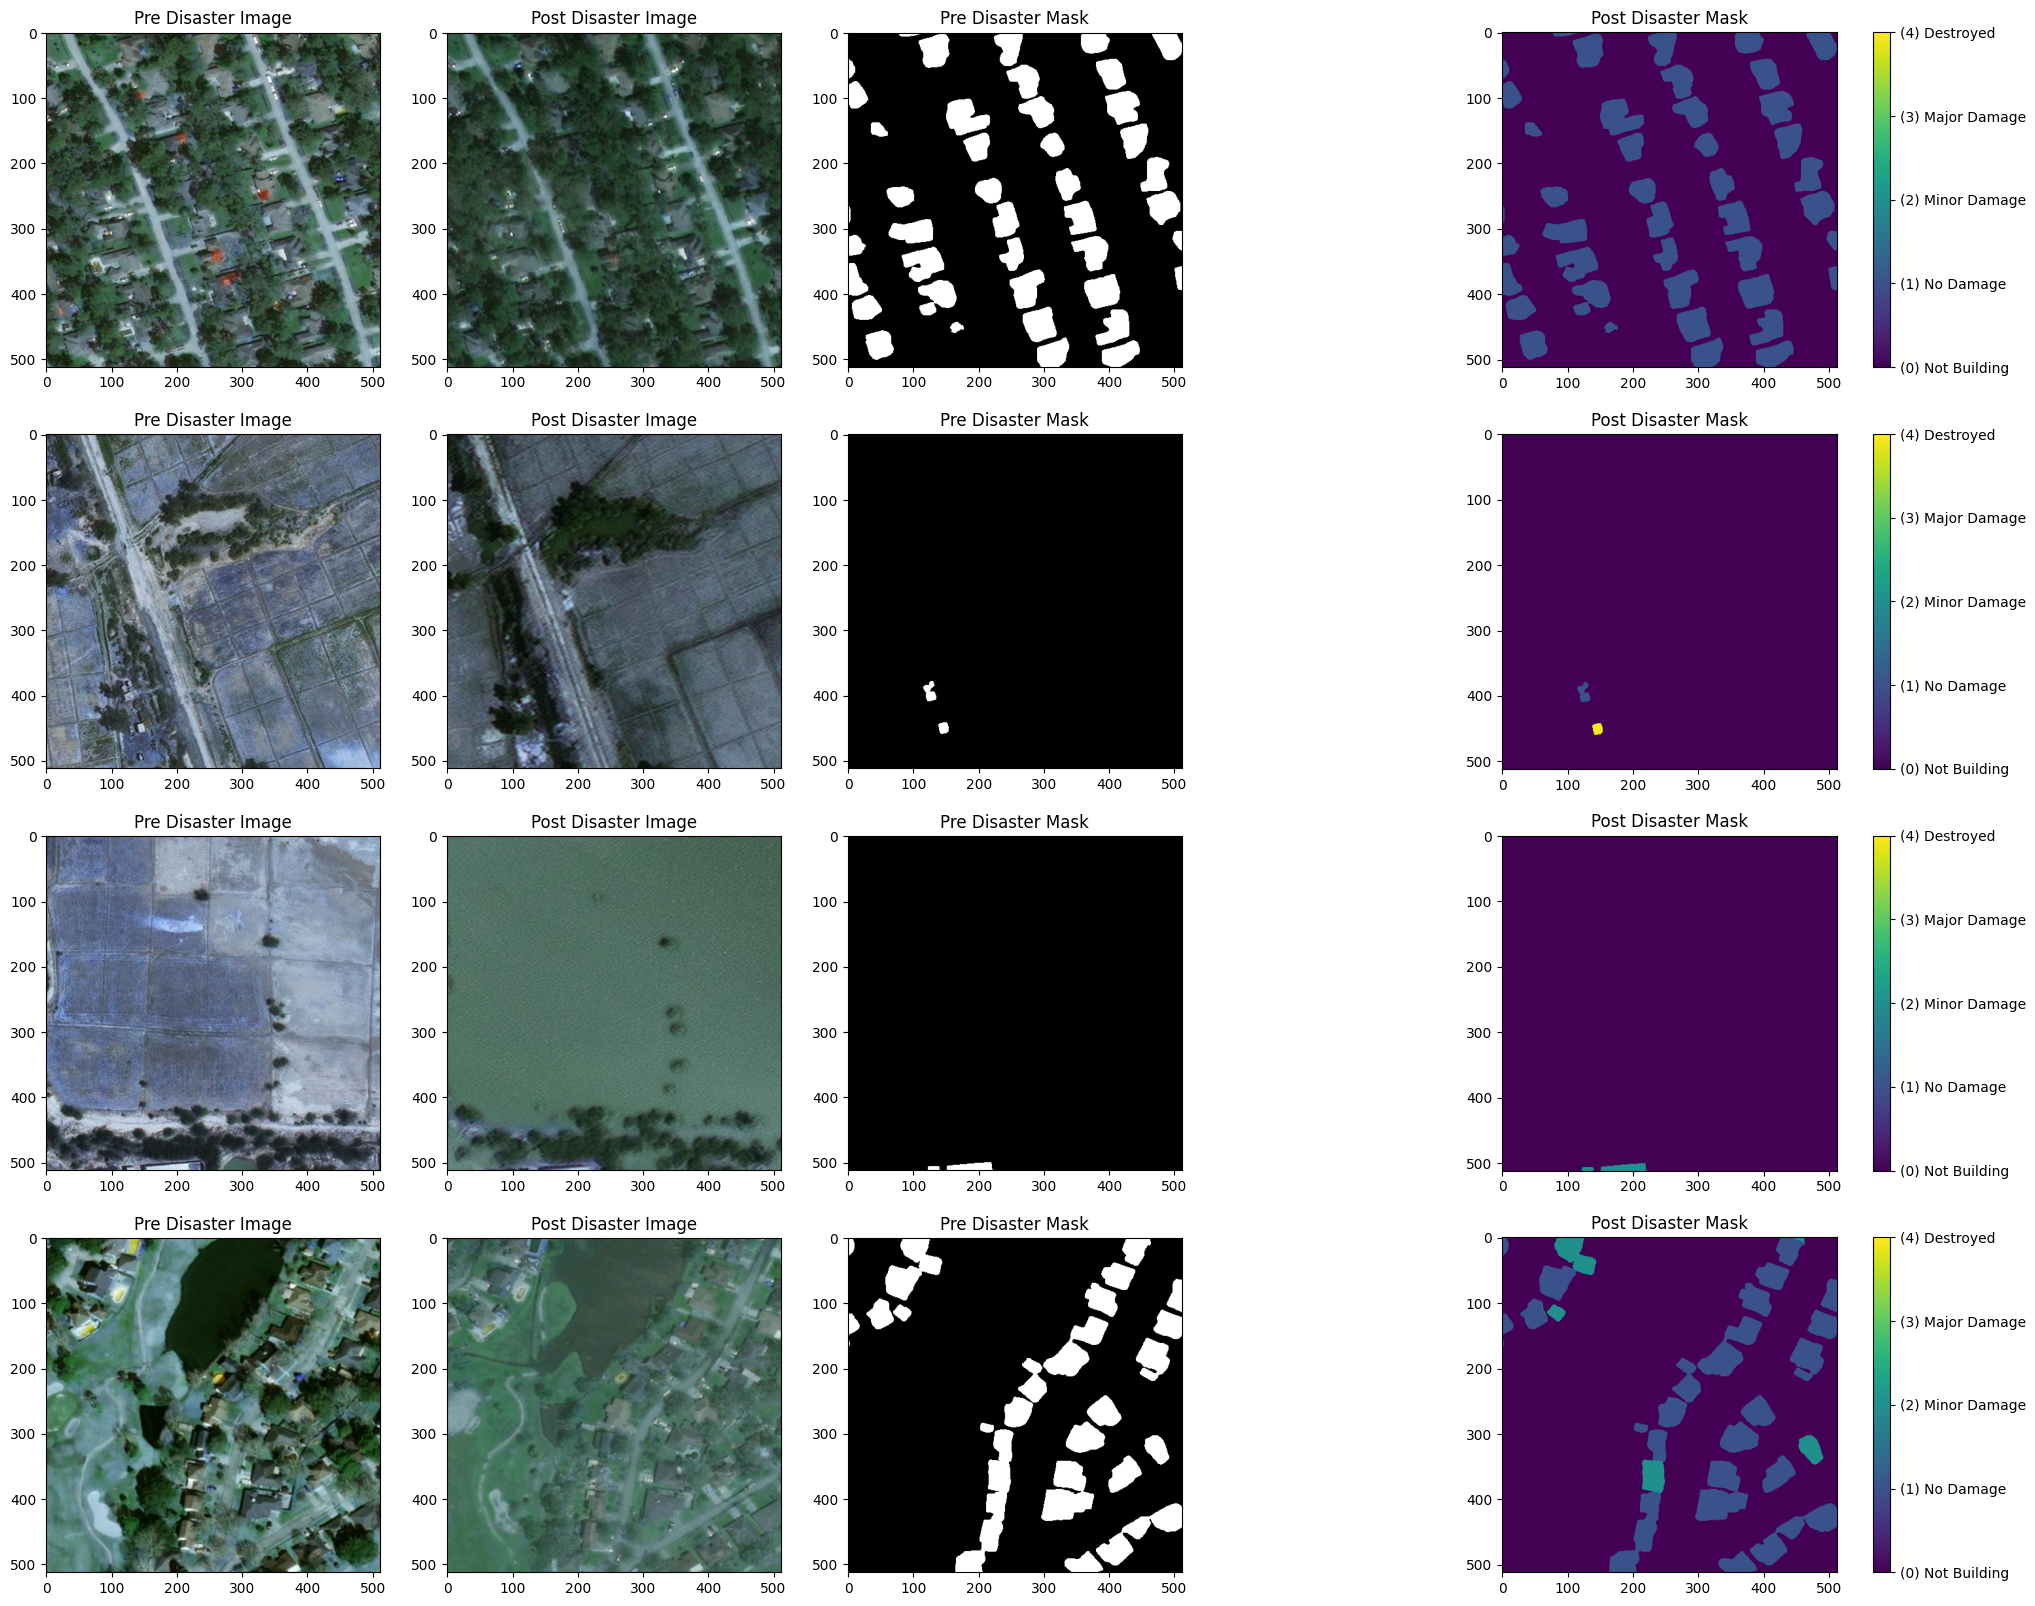

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

num_rows = 4
num_cols = 4 + 1

target_level = 4
found_target_level = False

current_row = 0
plt.figure(figsize=(5 * num_cols, 5 * num_rows))
all_data_merged = []
for ds in DATASETS:
    all_data_merged.extend(ds.all_data)
random.shuffle(all_data_merged)
for i, data in enumerate(all_data_merged):

    post_target = cv2.imread(data.post_target, cv2.IMREAD_GRAYSCALE)
    if post_target.max() <= 1:
        continue

    if current_row >= num_rows: # row condition is met.
        if found_target_level: # if target level condition is also met, exit.
            break
        elif target_level in np.unique(post_target): # otherwise, if target level condition is to be met in this iteration, continue in normal flow.
            pass
        else: # otherwise, continue (skip) until target level condition is met. 
            continue

    base_idx = num_cols * min(current_row, num_rows-1)
    print(f"Row {current_row}: data {i} ({data.stem})", end=" | ")

    pre_img = cv2.imread(data.pre_img)
    plt.subplot(num_rows, num_cols, base_idx + 1 )
    plt.imshow(pre_img)
    plt.title("Pre Disaster Image")

    post_img = cv2.imread(data.post_img)
    plt.subplot(num_rows, num_cols, base_idx + 2 )
    plt.imshow(post_img)
    plt.title("Post Disaster Image")

    pre_target = cv2.imread(data.pre_target, cv2.IMREAD_GRAYSCALE)
    plt.subplot(num_rows, num_cols, base_idx + 3 )
    plt.imshow(pre_target, cmap="gray")
    plt.title("Pre Disaster Mask")
    print("Pre Disaster Mask Values:", np.unique(pre_target),  end=" | ")

    found_target_level = found_target_level or target_level in np.unique(post_target) # do not set to False if once set to True
    ax = plt.subplot(num_rows, num_cols, (base_idx + 4, base_idx + 5) )
    im = plt.imshow(post_target, vmin=0, vmax=4)
    plt.title("Post Disaster Mask")
    cbar = plt.colorbar(im, ax=ax, orientation="vertical")
    cbar.set_ticks(list(damage_levels_dict.keys()))
    cbar.set_ticklabels([f"({i}) {damage_levels_dict[i]}" for i in damage_levels_dict.keys()] )
    # cbar.set_label("Damage Levels")
    print("Post Disaster Mask Values:", np.unique(post_target))

    current_row += 1 # increase when a new row is added to the plot. 

plt.show()
